In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
# Getting data and creating DataFrame
data = {
    'Возраст': [22, 28, 35, 19, 30, 25, 31, 20, 40, 27, 23, 38, 29, 26, 33, 21, 39, 28, 24, 36, 25, 32, 22, 37, 29],
    'Время в играх': [1.67433, 2.85995, 3.52061, 1.18727, 2.9667, 2.30056, 3.15212, 1.60036, 4.22803, 2.26029, 1.703, 3.89607, 2.73117, 2.47904, 3.46597, 1.616, 4.05818, 2.91622, 1.77904, 3.80593, 2.30809, 3.38738, 1.57801, 3.69475, 2.84091],
    'Расходы на игры': [58, 91, 123, 47, 102, 88, 114, 43, 145, 92, 65, 142, 104, 94, 132, 53, 148, 91, 61, 137, 67, 111, 50, 133, 103]
}

df = pd.DataFrame(data)

# Getting X
X = df.values

# Scaling data
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)

# Using tsne
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_centered)


In [6]:
X_tsne

array([[-20.608606  ,  62.023167  ],
       [  0.57108486,   1.0094888 ],
       [ 22.411207  , -52.439903  ],
       [-20.11981   ,  82.080055  ],
       [  7.066237  , -17.059458  ],
       [ -7.4323077 ,  25.945086  ],
       [ 11.045139  , -28.587008  ],
       [-27.22302   ,  76.63526   ],
       [ 27.449396  , -80.15066   ],
       [-10.629478  ,  18.396708  ],
       [-12.656604  ,  58.947018  ],
       [ 24.099432  , -71.43573   ],
       [  0.2687813 , -10.50143   ],
       [ -3.0332625 ,  18.647547  ],
       [ 15.419509  , -49.486134  ],
       [-19.70027   ,  70.69604   ],
       [ 32.424107  , -73.55861   ],
       [  7.563344  ,   1.3837888 ],
       [-17.303057  ,  52.511894  ],
       [ 19.403917  , -63.91528   ],
       [-11.599874  ,  38.44502   ],
       [ 13.602745  , -35.436947  ],
       [-27.159946  ,  67.33348   ],
       [ 26.760422  , -62.02069   ],
       [  7.6892858 ,  -9.129462  ]], dtype=float32)

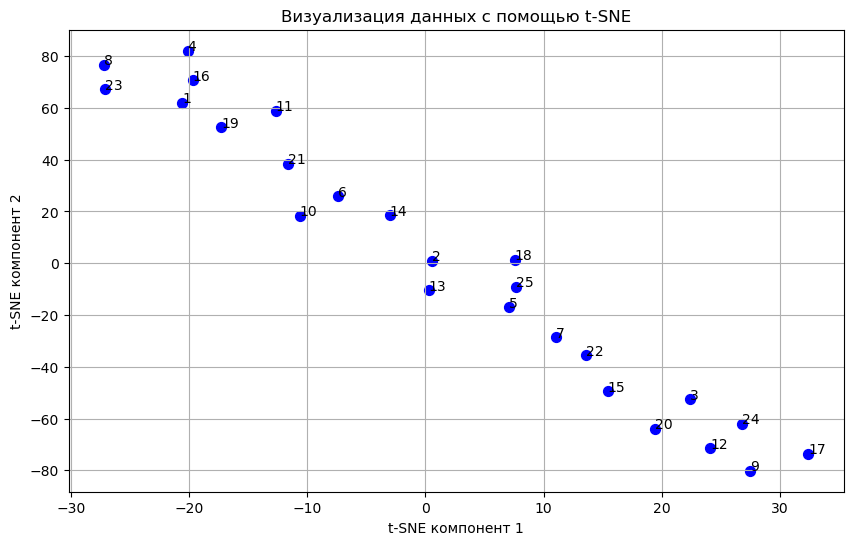

In [7]:
# Visulization
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c="b", marker="o", s=50)

# Enumeration
for i, txt in enumerate(range(1, len(df) + 1)):
    plt.annotate(txt, (X_tsne[i, 0], X_tsne[i,1]))
    
plt.title('Визуализация данных с помощью t-SNE')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.grid(True)

plt.show()

In [8]:
from sklearn.cluster import KMeans

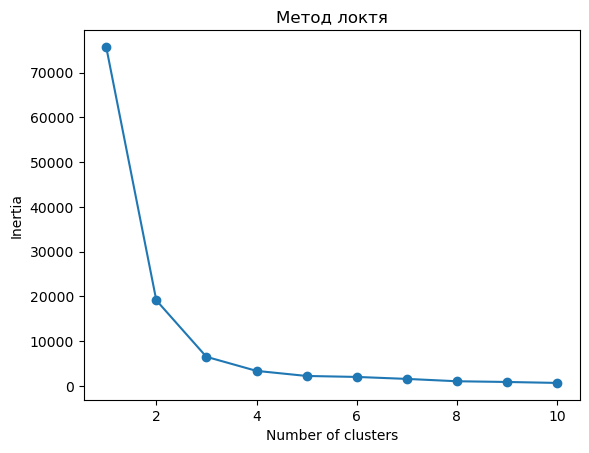

In [9]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_transform(X_tsne)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Метод локтя")
plt.show()

In [10]:
n_clusters = 3
kmeans = KMeans(n_clusters, random_state=42)
kmeans.fit(X_tsne)

labels = kmeans.labels_
labels

array([2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1,
       2, 1, 0], dtype=int32)

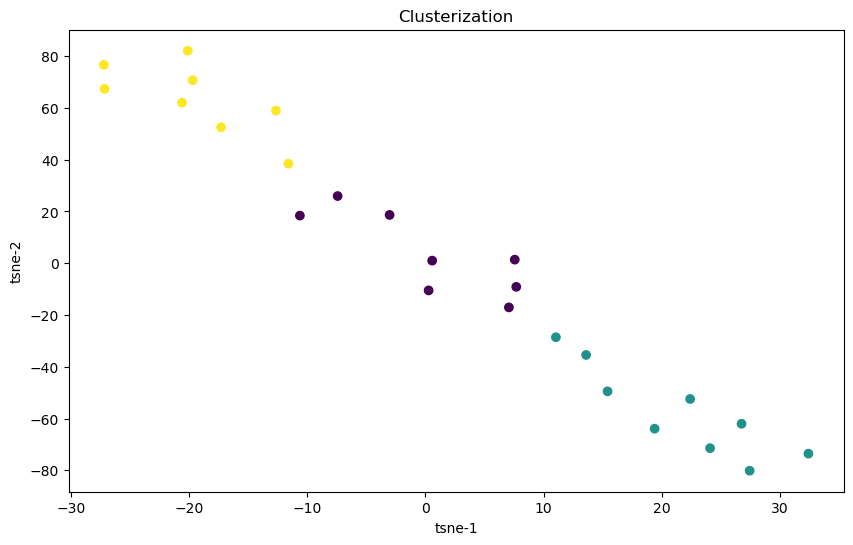

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap="viridis")
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
plt.title("Clusterization")

plt.show()

In [13]:
# Добавляем информацию о кластерах в исходный датафрейм
df['Кластер'] = labels

# Выводим информацию о каждом кластере
for i in range(n_clusters):
    print(f"\nКластер {i+1}:")
    print(df[df['Кластер'] == i].describe().to_markdown(numalign="left", stralign="left"))


Кластер 1:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 8         | 8               | 8                 | 8         |
| mean  | 27.75     | 2.66935         | 95.625            | 0         |
| std   | 1.66905   | 0.282463        | 6.3457            | 0         |
| min   | 25        | 2.26029         | 88                | 0         |
| 25%   | 26.75     | 2.43442         | 91                | 0         |
| 50%   | 28        | 2.78604         | 93                | 0         |
| 75%   | 29        | 2.87402         | 102.25            | 0         |
| max   | 30        | 2.9667          | 104               | 0         |

Кластер 2:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 9         | 9               | 9                 | 9         |
| mean  | 35.6667   | 3.68989         | 

In [14]:
from sklearn.cluster import DBSCAN

In [22]:
eps = 0.3
min_samples = 3

dbscan = DBSCAN(eps=eps,min_samples=min_samples)
labels = dbscan.fit_predict(X_tsne)


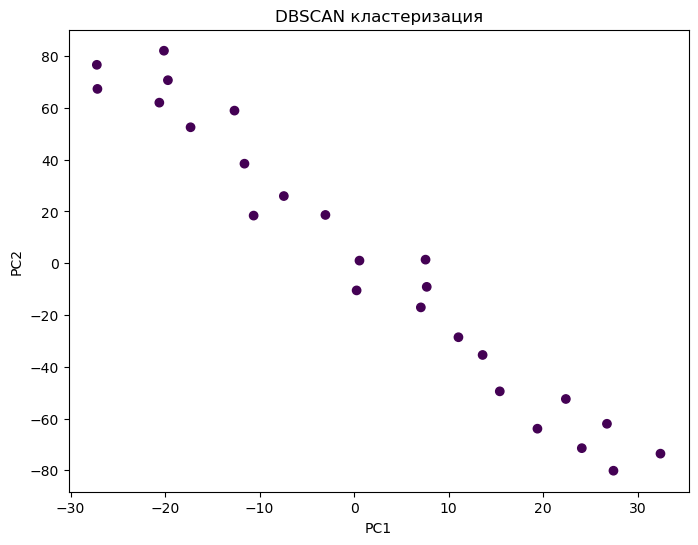

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN кластеризация')
plt.show()